<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/02_probability_mass_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [32]:
from collections import Counter

import numpy as np
import pandas as pd

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
# agian, let's select live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]

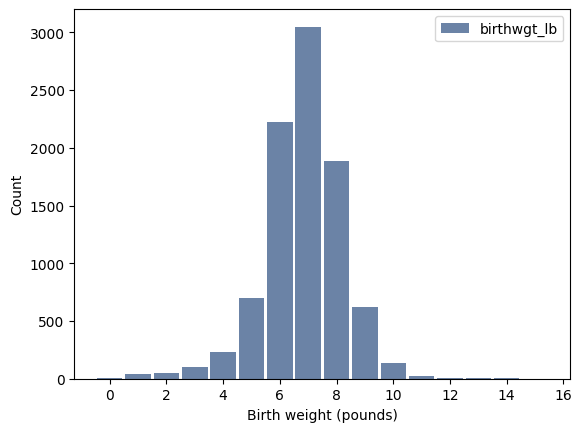

In [6]:
# Here's the histogram of birth weights
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

##PMF

A probability is a frequency expressed as a
fraction of the sample size, `n`. To get from frequencies to probabilities, we divide through
by `n`, which is called normalization.

Another way to represent a distribution is a probability mass function (PMF), which
maps from each value to its probability

Given a Hist, we can make a dictionary that maps from each value to its probability:

In [7]:
# To normalize the disrtibution, we could divide through by the total count
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
  pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

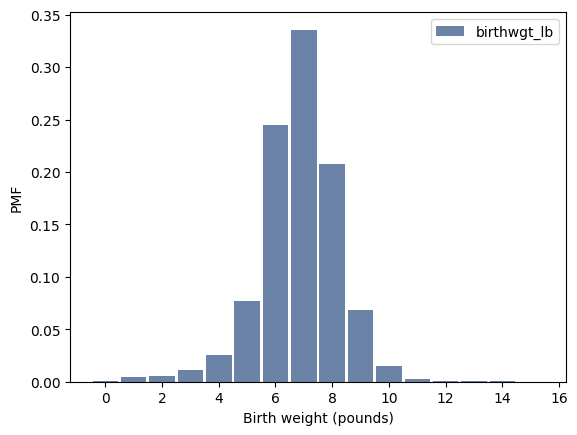

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="PMF")

More directly, we can create a PMF object.

In [9]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

The PMF is normalized so total probability is 1.

In [10]:
pmf.Prob(2)

0.4

In [11]:
pmf.Prob(3)

0.2

In [12]:
pmf[2]

0.4

In [13]:
pmf[3]

0.2

The biggest difference is that a Hist maps from values to integer
counters; a PMF maps from values to floating-point probabilities.

We can modify an existing PMF by incrementing the probability associated with a value

In [14]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

In [15]:
pmf.Incr(3, 0.5)
pmf[3]

0.7

Or you can multiply a probability by a factor.

In [16]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

If you modify a PMF, the result may not be normalized; that is, the probabilities may no
longer add up to 1.

Total returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [17]:
pmf.Total()

1.4

Normalize divides through by the total probability, making it 1 again.

In [18]:
pmf.Normalize()
pmf.Total()

1.0

##Plotting PMFs

In [19]:
# Here's the PMF of pregnancy length for live births
pmf = thinkstats2.Pmf(live.prglngth, label="prglngth")

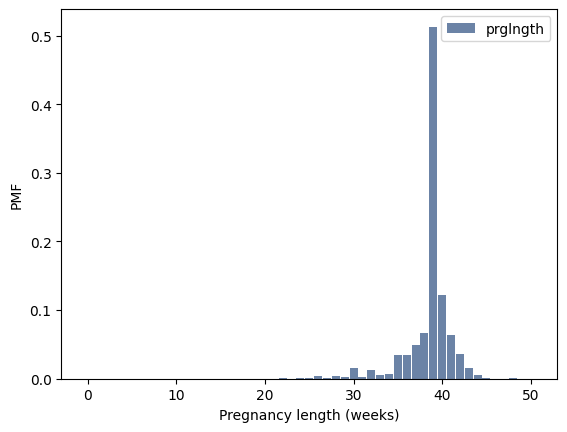

In [20]:
# Here's what it looks like plotted with Hist, which makes a bar graph
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="PMF")

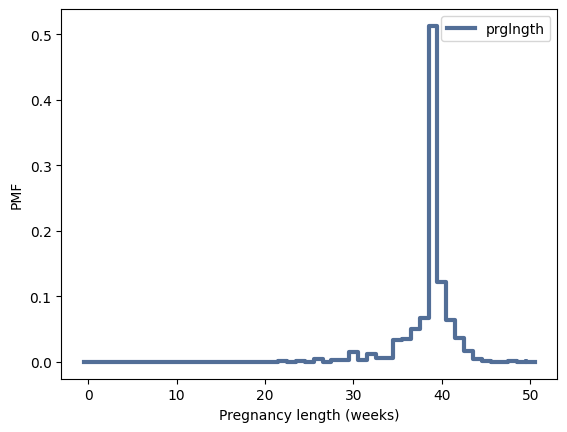

In [21]:
# Here's what it looks like plotted with Pmf, which makes a step function.
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="PMF")

We can use MakeFrames to return DataFrames for all live births, first babies, and others.

In [22]:
live, firsts, others = first.MakeFrames()

# Here are the distributions of pregnancy length.
first_pmf = thinkstats2.Pmf(firsts.prglngth, label="firsts")
other_pmf = thinkstats2.Pmf(others.prglngth, label="others")

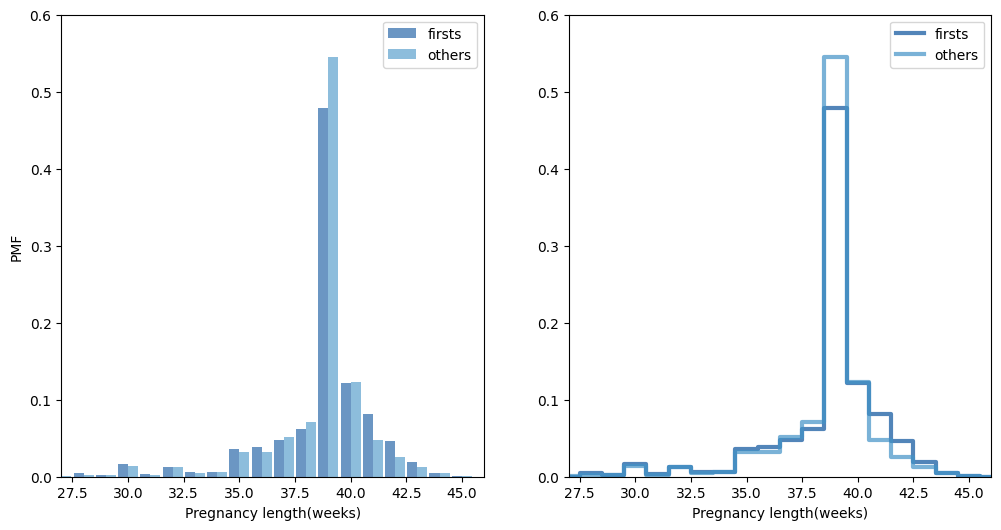

In [23]:
width = 0.45
axis = [27, 46, 0, 0.6]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Pregnancy length(weeks)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Pregnancy length(weeks)", axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term").

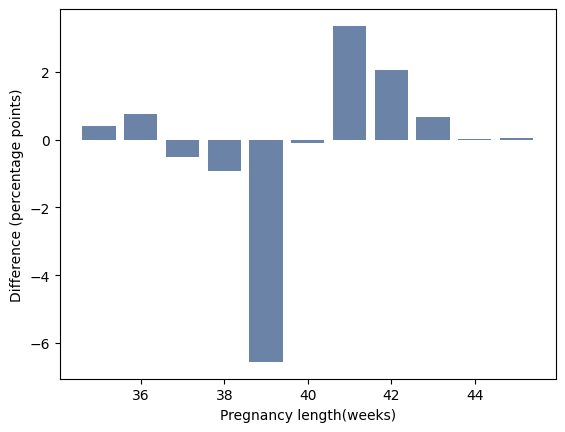

In [24]:
weeks = range(35, 46)
diffs = []

for week in weeks:
  p1 = first_pmf.Prob(week)
  p2 = other_pmf.Prob(week)
  diff = 100 * (p1 - p2)
  diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel="Pregnancy length(weeks)", ylabel="Difference (percentage points)")

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

##Class Size Paradox

Suppose we have the following distribution of class sizes.

In [25]:
d = {7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

pmf = thinkstats2.Pmf(d, label="actual")

Let's computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [26]:
def bias_pmf(pmf, label):
  new_pmf = pmf.Copy(label=label)
  for x, p in pmf.Items():
    new_pmf.Mult(x, x)
  new_pmf.Normalize()
  return new_pmf

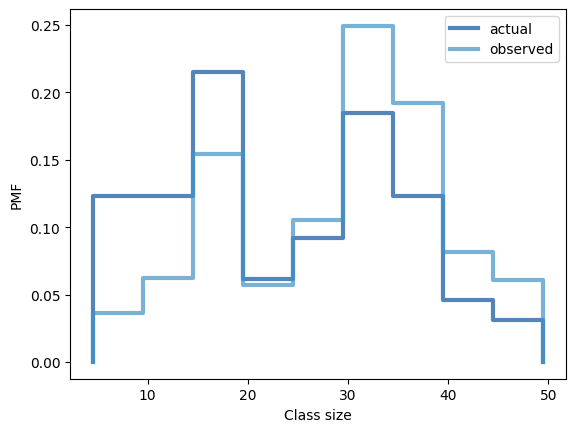

In [27]:
# let's shows the difference between the actual and observed distributions.
biased_pmf = bias_pmf(pmf, label="observed")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Class size", ylabel="PMF")

The observed mean is substantially higher than the actual.

In [28]:
print("Actual mean", pmf.Mean())
print("Observed mean", biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [29]:
def unbias_pmf(pmf, label=None):
  new_pmf = pmf.Copy(label=label)
  for x, p in pmf.Items():
    new_pmf[x] *= 1 / x
  new_pmf.Normalize()
  return new_pmf

We can unbias the biased PMF.

In [30]:
unbiased = unbias_pmf(biased_pmf, label="unbiased")
print("Unbiased mean", unbiased.Mean())

Unbiased mean 23.69230769230769


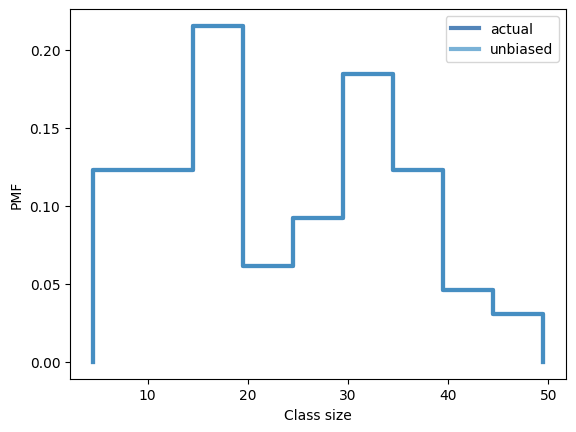

In [31]:
# let's  plot the two distributions to confirm they are the same
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel="Class size", ylabel="PMF")

##DataFrame Indexing

In [34]:
# let's create a NumPy array of random numbers and use it to initialize a DataFrame
array = np.random.randn(4, 2)
df = pd.DataFrame(array)
df

,0,1
0,1.469870,-0.382648
1,0.131910,1.144208
2,0.570550,-0.276475
3,0.018141,-0.557578


In [35]:
# let's provide column names
columns = ["A", "B"]
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,1.469870,-0.382648
1,0.131910,1.144208
2,0.570550,-0.276475
3,0.018141,-0.557578


In [36]:
# let's also provide row names
index = ["a", "b", "c", "d"]
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,1.469870,-0.382648
b,0.131910,1.144208
c,0.570550,-0.276475
d,0.018141,-0.557578


In [37]:
# simple indexing selects a column, returning a Series
df["A"]

a    1.469870
b    0.131910
c    0.570550
d    0.018141
Name: A, dtype: float64

In [38]:
df["B"]

a   -0.382648
b    1.144208
c   -0.276475
d   -0.557578
Name: B, dtype: float64

In [39]:
# To select a row by label, you can use the loc attribute, which returns a Series
df.loc["a"]

A    1.469870
B   -0.382648
Name: a, dtype: float64

In [40]:
df.loc["d"]

A    0.018141
B   -0.557578
Name: d, dtype: float64

In [41]:
# If you know the integer position of a row, rather than its label, you can use the iloc attribute, which also returns a Series.
df.iloc[0]

A    1.469870
B   -0.382648
Name: a, dtype: float64

In [42]:
df.iloc[3]

A    0.018141
B   -0.557578
Name: d, dtype: float64

In [44]:
# loc can also take a list of labels; in that case, the result is a DataFrame
indices = ["a", "c"]
df.loc[indices]

,A,B
a,1.46987,-0.382648
c,0.57055,-0.276475


In [45]:
indices = ["a", "d"]
df.loc[indices]

,A,B
a,1.469870,-0.382648
d,0.018141,-0.557578


In [48]:
# you can use a slice to select a range of rows by label
df["a":"c"]

,A,B
a,1.46987,-0.382648
b,0.13191,1.144208
c,0.57055,-0.276475


In [50]:
# Or by integer position
df[0:3]

,A,B
a,1.46987,-0.382648
b,0.13191,1.144208
c,0.57055,-0.276475


##Exercises